In [2]:
from utils.binaries import *
from utils.plotting import *

09:47:30 ( +233.4s) [INFO   ] -- import logging
09:47:30 (    +2ms) [INFO   ] -- import numpy as np
09:47:30 (    +4ms) [INFO   ] -- import uncertainties
09:47:30 (    +2ms) [INFO   ] -- import numpy as np
09:47:30 (    +4ms) [INFO   ] -- import uncertainties
09:47:30 (  +150ms) [INFO   ] -- import pandas as pd
09:47:30 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
09:47:30 (    +1ms) [INFO   ] -- import binaries.tools as tools
09:47:31 (  +212ms) [INFO   ] -- import matplotlib.pyplot as plt
09:47:31 (   +22ms) [INFO   ] -- import seaborn as so
09:47:31 (    +2ms) [INFO   ] -- import plotting.tools as plot
09:47:31 (    +4ms) [DEBUG  ] -- font size set to 9.5
09:47:31 (    +1ms) [DEBUG  ] -- label size set to 13.0
09:47:31 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
09:47:31 (    +0ms) [DEBUG  ] -- markersize set to 2.0
09:47:31 (    +1ms) [DEBUG  ] -- usetex set to False


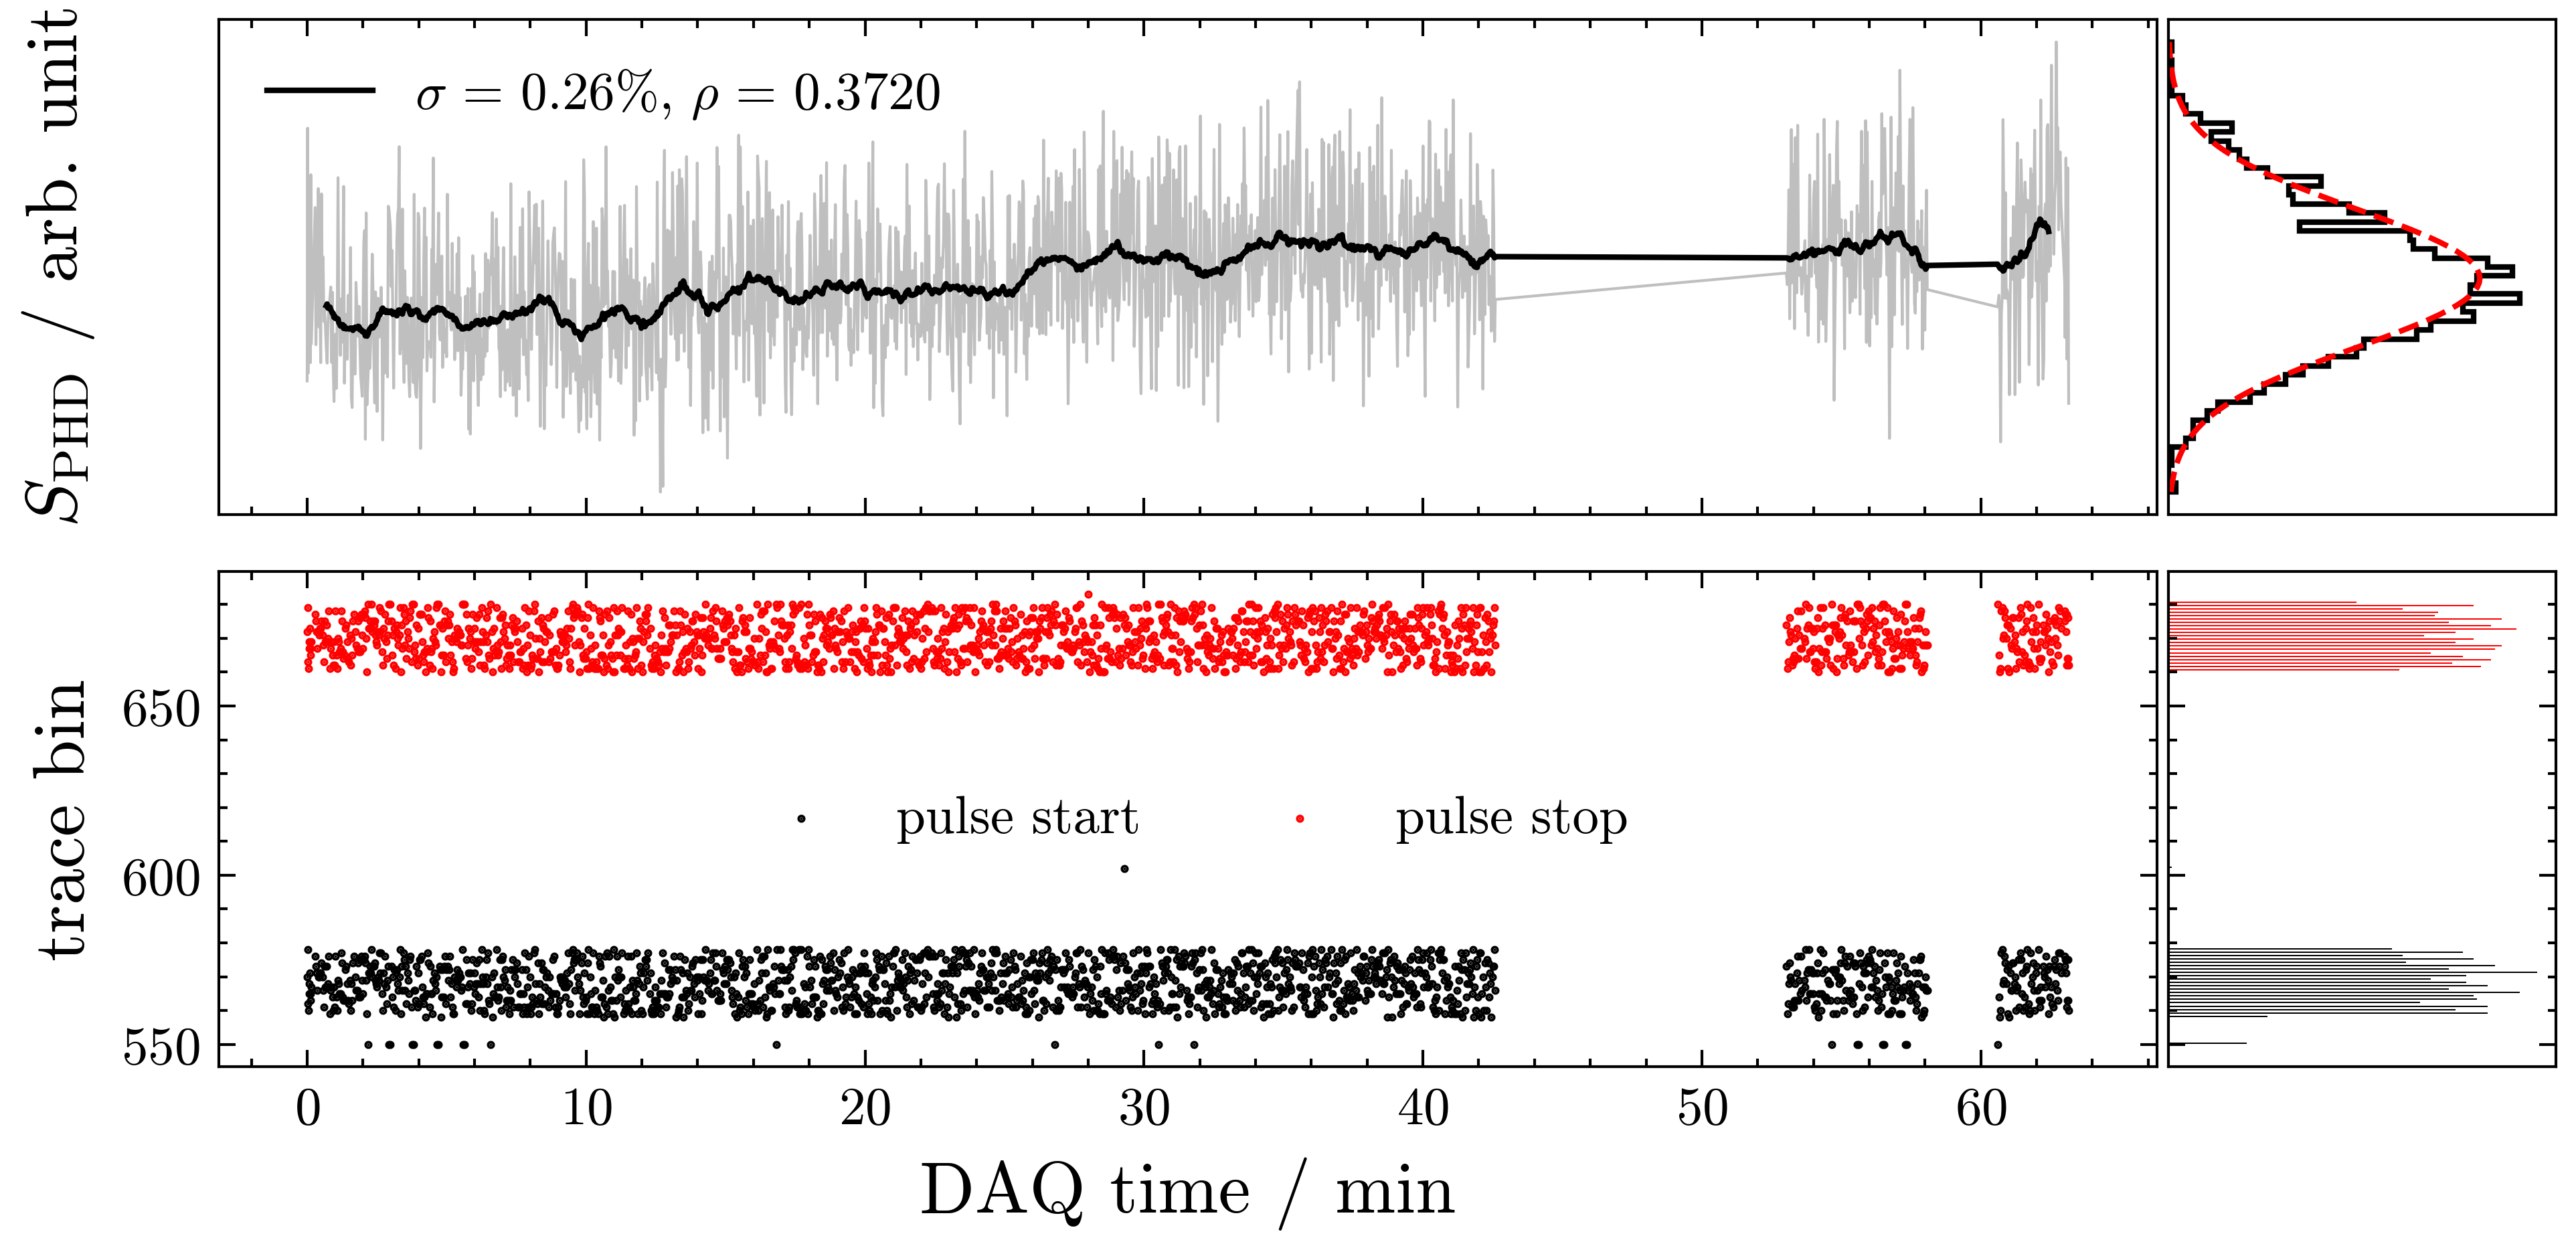

In [61]:
from matplotlib.gridspec import GridSpec
from scipy.stats import norm

MAX_NOISE   = 0.02
MAX_JUMP    = 0.10
MAX_LOST    = 0.15

XY_RUN = '6020x'

df = pd.read_csv(f'/home/filip/xy-calibration/results/outPositionsComb_{XY_RUN}.txt', sep=',', names=('time', 'x', 'y', 
                    'event_number', 'user_id', 'temp_led', 'temp_phd', 'temp_board', 'phd_signal', 
                    'FDeventSum'), comment='#', header=0)
pulse_timing = pd.read_csv(f'/home/filip/xy-calibration/results/pulseTiming_{XY_RUN}.txt', sep=' ', names=('eventId', 
                        'pulse_begin', 'pulse_end', 'pulse_length', 'type'), comment='#')

# df.loc[500, 'phd_signal'] = 0
running_mean = np.convolve(df['phd_signal'], np.ones(50)/50, mode='valid')
mean, std = df['phd_signal'].mean(), df['phd_signal'].std()
rho = np.corrcoef(df['time'], df['phd_signal'])[0, 1]

lost_pulses_ratio = (pulse_timing['type'].sum() + len(pulse_timing['type'])) / len(pulse_timing['type'])
# pulse_length_variation = pulse_timing['pulse_length'].std() / pulse_timing['pulse_length'].mean()


if True:
    # fig = plt.figure(figsize=(6.6, 3.3))
    # gs = GridSpec(
    #     2, 2,
    #     fig,
    #     width_ratios=[1, 0.2],
    #     height_ratios=[1, 1]
    # )
    # gs.update(hspace=0.4)

    # ax3 = fig.add_subplot(gs[1, 0])
    # ax1 = fig.add_subplot(gs[0, 0], sharex=ax3)
    # ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
    # ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, width_ratios=[1,0.2], height_ratios=[1,1],sharex='col', sharey='row')

    X = np.linspace(df['phd_signal'].min(), df['phd_signal'].max(), 100)
    ax2.hist(df['phd_signal'], bins=50, histtype='step', orientation='horizontal')
    ax2.plot(4.3e4*norm.pdf(X, mean, std), X, marker='none')
    ax2.set_yticks([])
    ax2.set_xticks([])
    # ax1.set_xticks([])

    ax1.plot(df['time'] / 60, df.phd_signal.values, c='gray', lw=0.5, alpha=0.5, ls='solid', marker='none')
    ax1.plot(df['time'][24:-25] / 60, running_mean, ls='solid', marker='none',
                label=fr"$\sigma\,=\,{std / mean * 100:.2f}\%$, $\rho\,=\,{rho:.4f}$")
    ax3.set(xlabel="DAQ time / min")
    ax1.set_ylabel(r"$S_\mathrm{PHD}$ / arb. unit", labelpad=22)
    # ax1.set_yticks([])
    ax1.legend()

    ax3.scatter(df['time'] / 60, pulse_timing['pulse_begin'], s=0.2, label='pulse start')
    ax3.scatter(df['time'] / 60, pulse_timing['pulse_end'], s=0.2, label='pulse stop')
    ax3.set_ylabel("trace bin")
    ax3.legend(ncol=2, loc='center')
    plt.setp(ax1.get_xticklabels(), visible=False, fontsize=0)

    ax4.hist([pulse_timing['pulse_begin'].values] + [pulse_timing['pulse_end'].values], 
                bins=np.arange(pulse_timing['pulse_begin'].min(), pulse_timing['pulse_end'].max(), 1), 
                orientation='horizontal')
    # ax4.set_xscale('log')
    plt.setp(ax4.get_yticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.01)


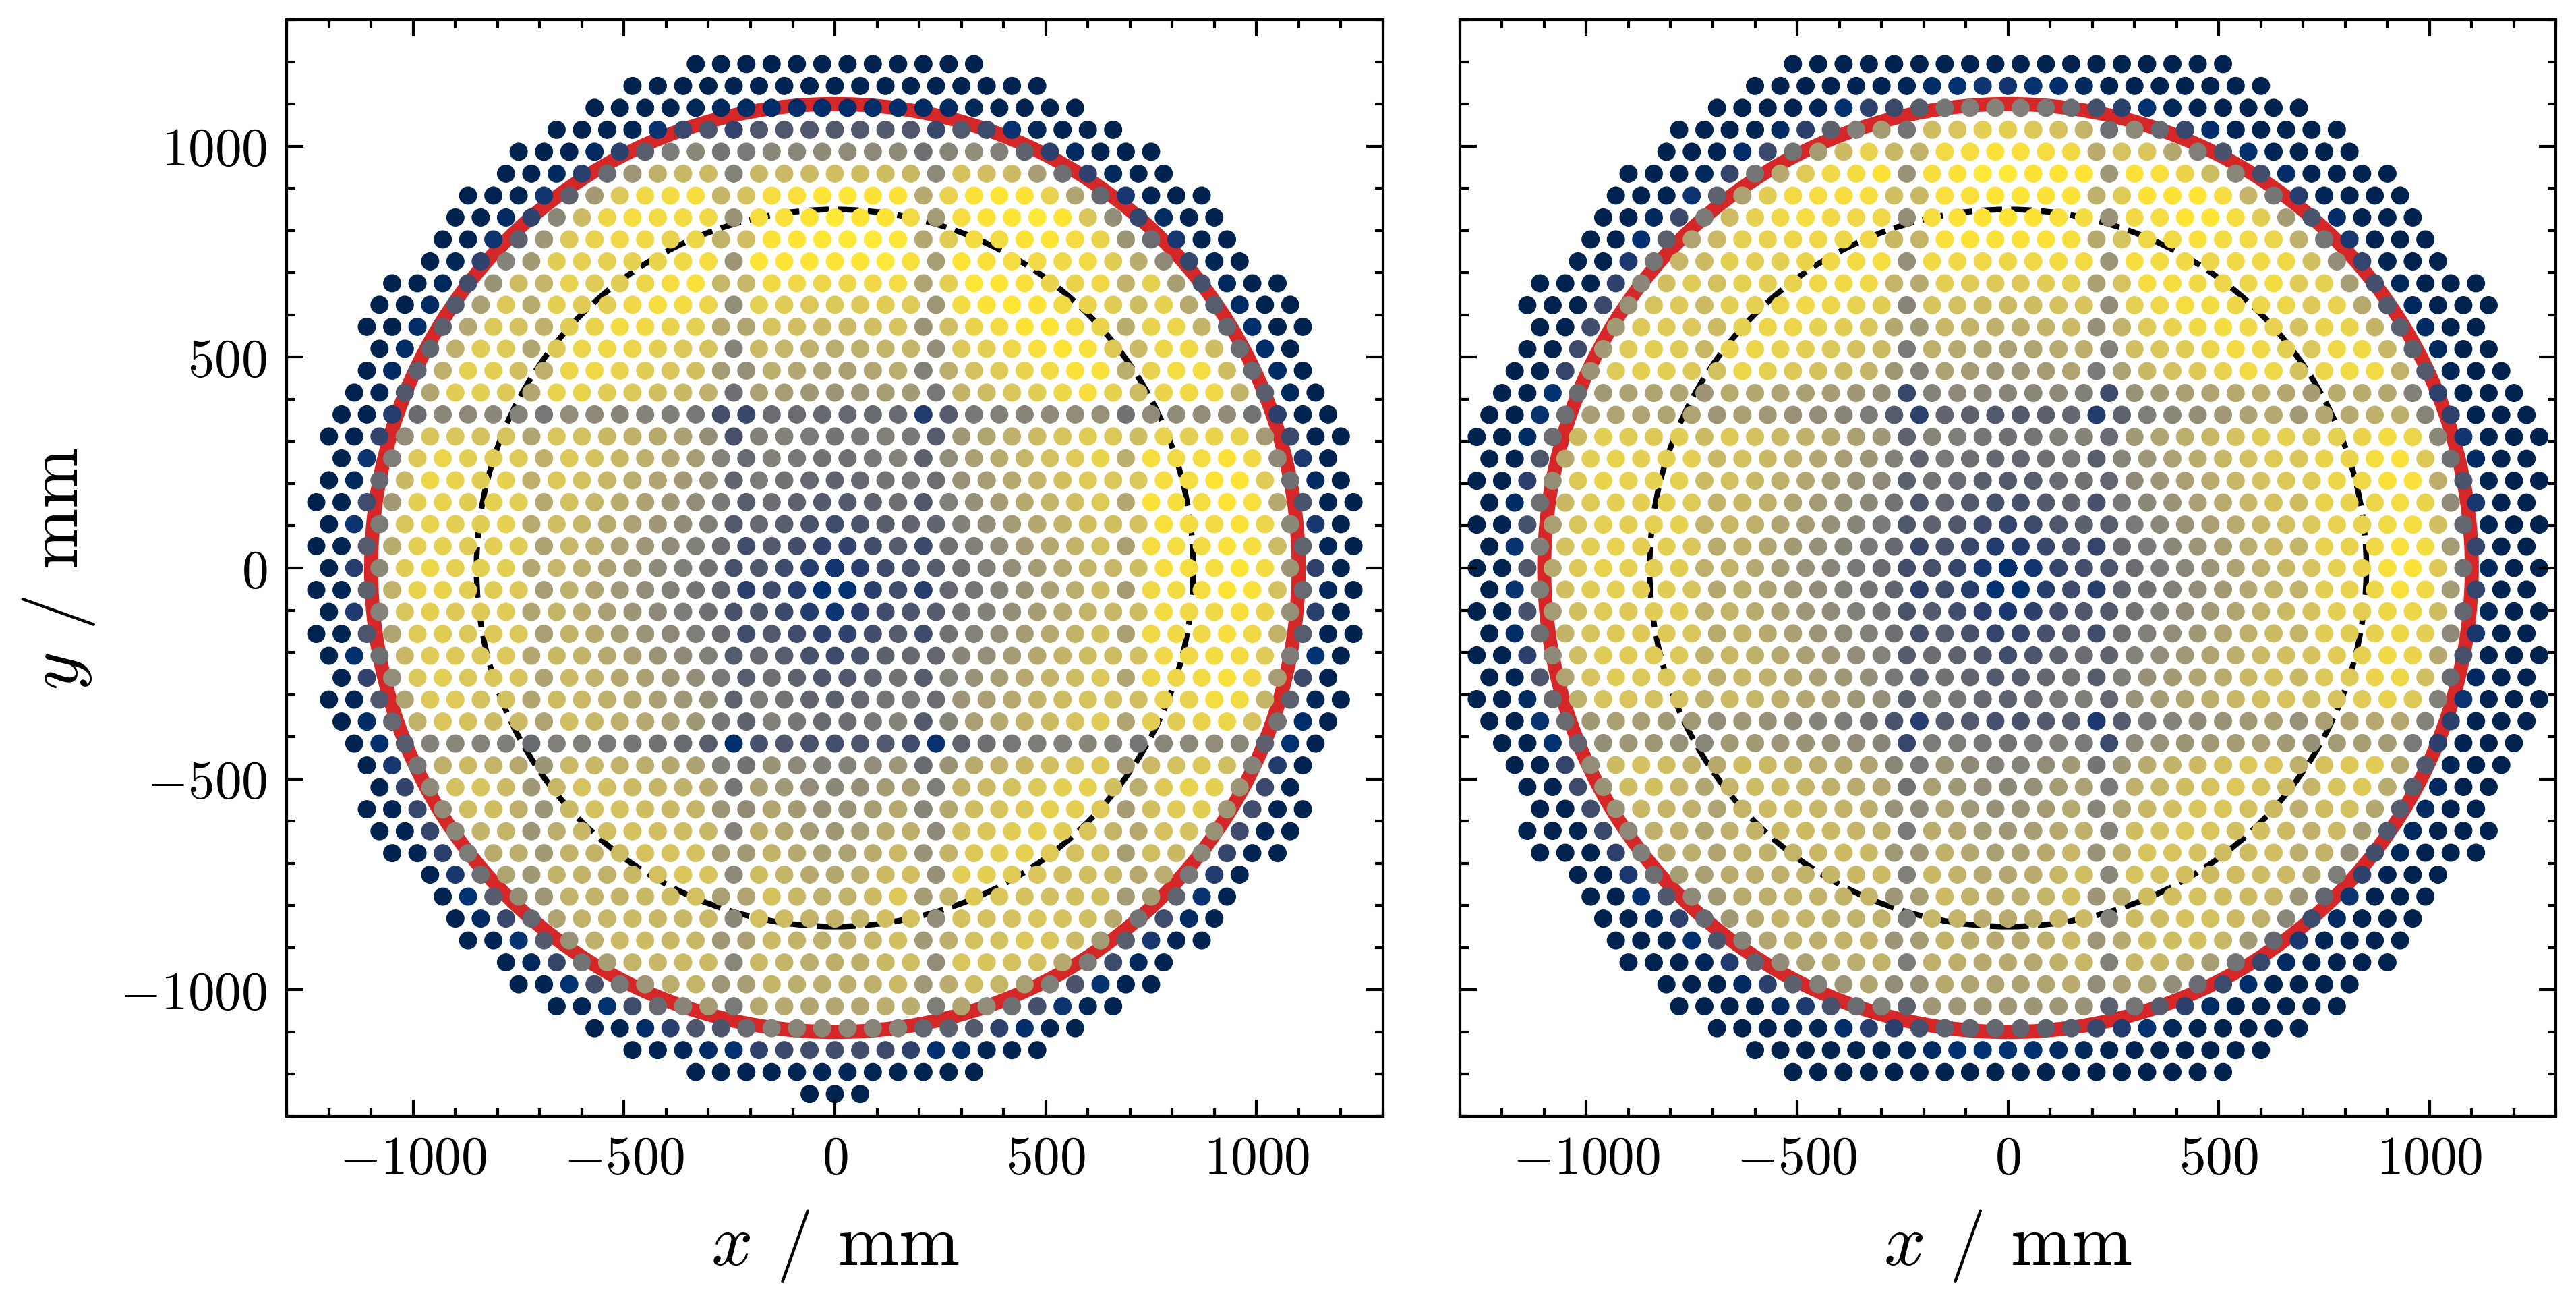

In [70]:
from utils.Auger.FD import AperturePlot

runs = ['15920x', '15451']
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

for ax, run in zip(axes, runs):
    df = pd.read_csv(f'/home/filip/xy-calibration/results/outPositionsComb_{run}.txt', sep=',', names=('time', 'x', 'y', 
                      'event_number', 'user_id', 'temp_led', 'temp_phd', 'temp_board', 'phd_signal', 
                      'FDeventSum'), comment='#', header=0)
    
    ax = AperturePlot(ax, filterStructure=False)
    ax.scatter(df['x'], df['y'], c=df['FDeventSum'] / df['FDeventSum'].max(), marker="o", cmap="cividis", s=5)

axes[0].set_ylabel("$y$ / mm")
axes[0].set_xlabel("$x$ / mm")
axes[1].set_xlabel("$x$ / mm")
plt.tight_layout()